# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.feature_selection import *
from sklearn.model_selection import *
from sklearn.metrics import *

sns.set_style('whitegrid')
pd.set_option('precision',2)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Load The Dataset**

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/App_Customer_Analytics/FineTech_appData.csv')

# **Exploring the dataset**


In [ ]:
dataset['hour'] = dataset['hour'].str.slice(1,3).astype(int)                    # hour data convert string to int 
dataset['dayofweek'] = dataset['dayofweek'].astype('category')                  # Chaging 

In [ ]:
# from pandas_profiling import ProfileReport                                    # Getting an overview about the dataset using pandas-profiling
# prof = ProfileReport(dataset)
# prof.to_file(output_file='output.html')

In [ ]:
# prof

In [ ]:
screen_list = dataset['screen_list']                                            # Exploring the screen coulumn
screen_list = screen_list.str.split(',')
screen_list_unique = {}
for row in screen_list:
  for e in row:
    screen_list_unique[e] = screen_list_unique.get(e,0) +  1  

In [ ]:
screen_list_unique

{'About': 553,
 'AccountView': 1311,
 'AddProperty': 4,
 'AddVehicle': 16,
 'AdverseActions': 13,
 'Alerts': 3457,
 'BVPlaidLinkContainer': 461,
 'BVStats': 24,
 'BankVerification': 15901,
 'BoostFriendsList': 57,
 'CC1': 4370,
 'CC1Category': 2998,
 'CC3': 1475,
 'CameraScreen': 103,
 'CommunityAndInvites': 4028,
 'ContactInfoConfirm': 69,
 'Credit1': 9741,
 'Credit2': 5402,
 'Credit3': 4889,
 'Credit3Alerts': 398,
 'Credit3CTA': 1,
 'Credit3Container': 16489,
 'Credit3Dashboard': 9530,
 'Credits': 41,
 'Cycle': 17777,
 'EditProfile': 2449,
 'EmploymentInfo': 8,
 'EmploymentSummary': 24,
 'Finances': 3819,
 'FindFriendsCycle': 765,
 'ForgotPassword': 181,
 'GroupedInstitutions': 1814,
 'History': 1617,
 'Home': 38098,
 'IdAndSelfieCameraScreen': 1,
 'IdentityVerification': 2,
 'InstantLoanSSN': 2,
 'InstantOfferCreateAccount': 61,
 'Institutions': 14648,
 'LLLoanAmount': 260,
 'LandingScreen': 279,
 'Leaderboard': 2576,
 'ListPicker': 379,
 'Loan': 549,
 'Loan1': 4603,
 'Loan2': 25319

In [ ]:
for col in dataset.columns:                                                     #Explorin the unqiue values of every column
  print('* The unique values of',col+':')
  print('-'*22 ,'-'*(len(col)+1))
  print(dataset[col].unique())
  print('\n')
  print('Number of unique values : '+ str(len(dataset[col].unique()))+'\n')
  

* The unique values of user:
---------------------- -----
[235136 333588 254414 ... 302367 324905  27047]


Number of unique values : 49874

* The unique values of first_open:
---------------------- -----------
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']


Number of unique values : 49747

* The unique values of dayofweek:
---------------------- ----------
[3, 6, 1, 4, 2, 0, 5]
Categories (7, int64): [3, 6, 1, 4, 2, 0, 5]


Number of unique values : 7

* The unique values of hour:
---------------------- -----
[ 2  1 19 16 18  9  3 14  4 11  6 21  5 17 20  0 22 10  8 15 13 23 12  7]


Number of unique values : 24

* The unique values of age:
---------------------- ----
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  

In [ ]:
cat_col = ['liked','enrolled','used_premium_feature','minigame']
for col in cat_col:
  dataset[col] = dataset[col].apply(lambda x: 'yes' if x == 1 else 'no')        # changing the categorical col from [1,0]  to ['yes','no']
dataset.dtypes                                                                  # get data type of each columns

user                       int64
first_open                object
dayofweek               category
hour                       int64
age                        int64
screen_list               object
numscreens                 int64
minigame                  object
used_premium_feature      object
enrolled                  object
enrolled_date             object
liked                     object
dtype: object

In [ ]:
dataset.head()                                                                  # Viewing the first 5 rows of the dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,no,no,no,NaN,no
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,no,no,no,NaN,no
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,no,yes,no,NaN,yes
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,no,no,yes,2013-07-05 16:11:49.513,no
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,no,no,yes,2013-02-26 18:56:37.841,yes


# **Univariate Analysis**

In [ ]:
import plotly.express as px
num_col = ['age','numscreens','hour']                                           # numerical features
cat_col = ['minigame','used_premium_feature','liked','dayofweek']               # categorical features

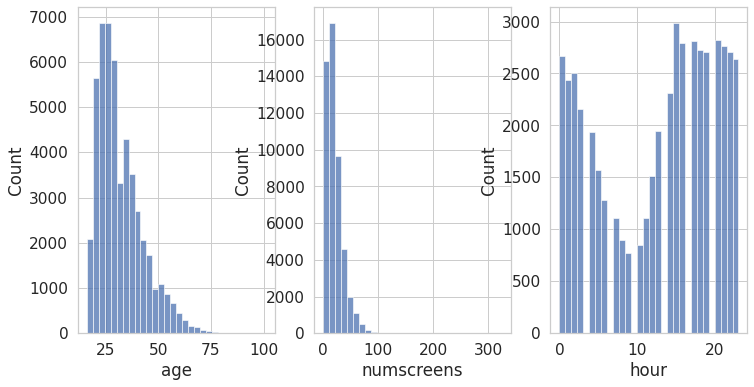

In [ ]:
fig, axes = plt.subplots(1,3,figsize=(12,6))                                    # Histograms of the numerical variables
for i,col in enumerate(num_col):
  sns.histplot(ax=axes[i],x=dataset[col],bins=30)
plt.show()

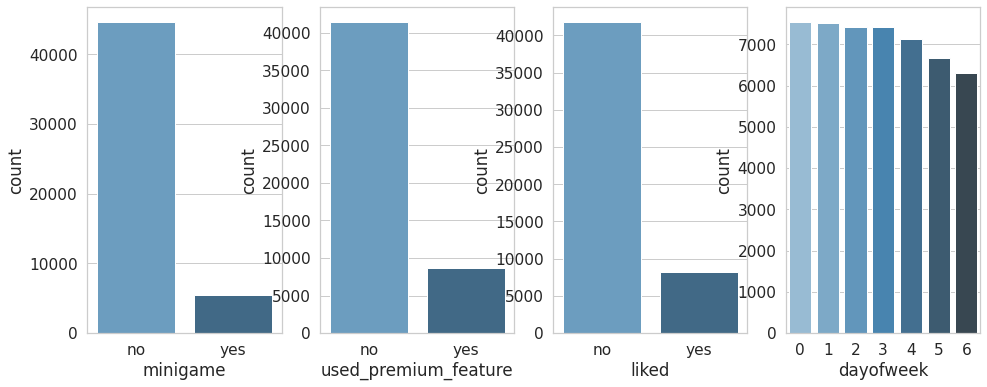

In [ ]:
fig, axes = plt.subplots(1,4,figsize=(16,6))                                    # Bar chart of the categorical variables
for i,col in enumerate(cat_col):
  val_count = dataset[col].value_counts()
  x = sorted(dataset[col].unique())
  y = [val_count[k] for k in x]
  sns.barplot(ax= axes[i],x= x, y=y,palette="Blues_d")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('count')

# **Miltiivariate Analysis**




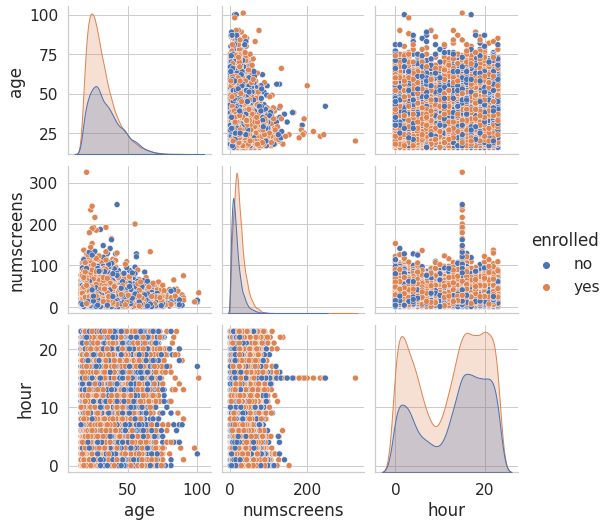

<Figure size 1152x1152 with 0 Axes>

In [ ]:
sns.pairplot(dataset[['age','numscreens','enrolled','hour']], hue  = 'enrolled')
plt.figure(figsize=(16,16))
plt.show()

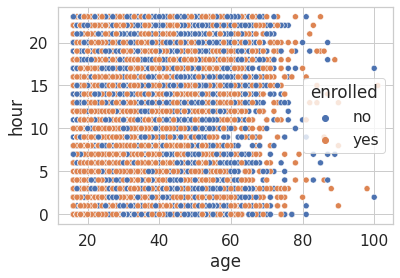

In [ ]:
sns.scatterplot(data=dataset, x="age", y="hour", hue="enrolled")                #Scatter plot of age and hour with the target variable

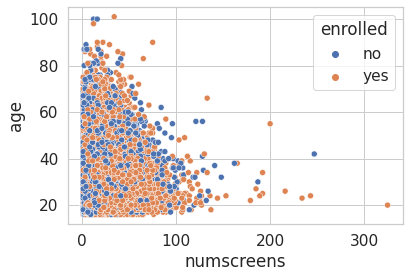

In [ ]:
sns.scatterplot(data=dataset, x="numscreens", y="age", hue="enrolled")          #Scatter plot of age and numscreens with the target variable
plt.show()

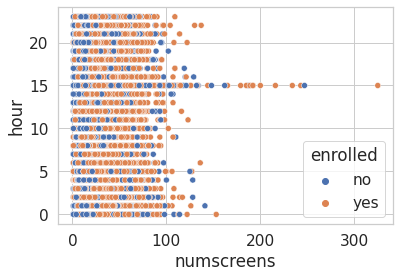

In [ ]:
sns.scatterplot(data=dataset, x="numscreens", y="hour", hue="enrolled")         #Scatter plot of age and numscreens with the target variable

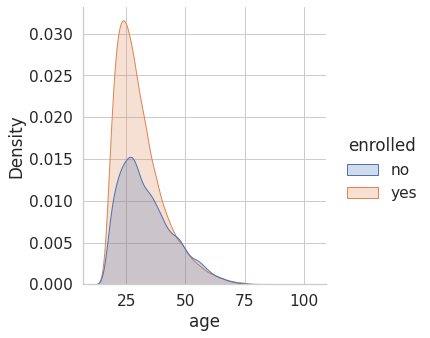

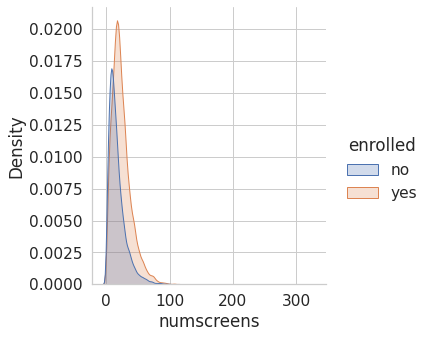

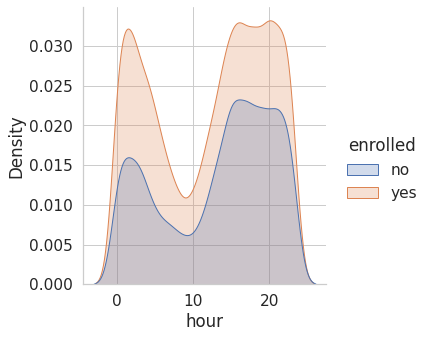

In [ ]:
# fig, axes = plt.subplots(1,3,figsize=(12,8))
for i,col in enumerate(num_col):
  sns.displot(dataset,x=col, hue="enrolled", kind="kde", fill=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try barplot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try barplot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try barplot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try barplot



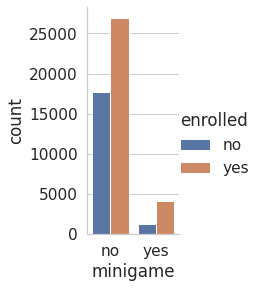

<Figure size 1008x576 with 0 Axes>

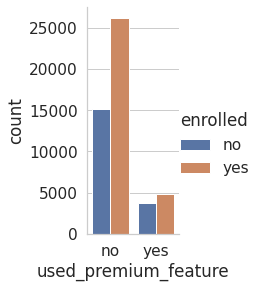

<Figure size 1008x576 with 0 Axes>

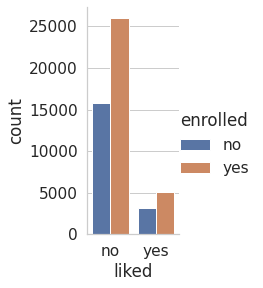

<Figure size 1008x576 with 0 Axes>

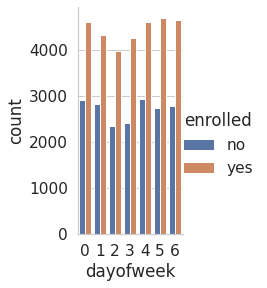

<Figure size 1008x576 with 0 Axes>

In [ ]:
for i,col in enumerate(cat_col):                                                #Bar plots of categorical variables with the target variable 
  dataset['dummy'] = np.ones(shape = dataset.shape[0])
  counts = dataset[['dummy', 'enrolled',col]].groupby(['enrolled',col], as_index = False).count()
  sns.catplot(x=col, y="dummy",
                hue="enrolled",ax = axes[i],
                data=counts, kind="bar",
                height=4, aspect=.7)
  plt.ylabel('count')
  plt.figure(figsize=(14,8))

# **Data Preprocessing**

In [ ]:
print(dataset[['first_open', 'enrolled_date']].dtypes)                          # These need to be converted to datetime object

from dateutil import parser
dataset['first_open'] = [parser.parse(row) for row in dataset['first_open']]
                                                                                # only convert in case of string inputs in case
                                                                                # of 'enrolled_date', otherwise it will throw an error

dataset['enrolled_date'] = [parser.parse(row) if isinstance(row, str) else row for row in dataset['enrolled_date']]
dataset[['first_open', 'enrolled_date']].dtypes

first_open       object
enrolled_date    object
dtype: object


first_open       datetime64[ns]
enrolled_date    datetime64[ns]
dtype: object

In [ ]:
dataset['difference']  = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')   #Creating the difference column 

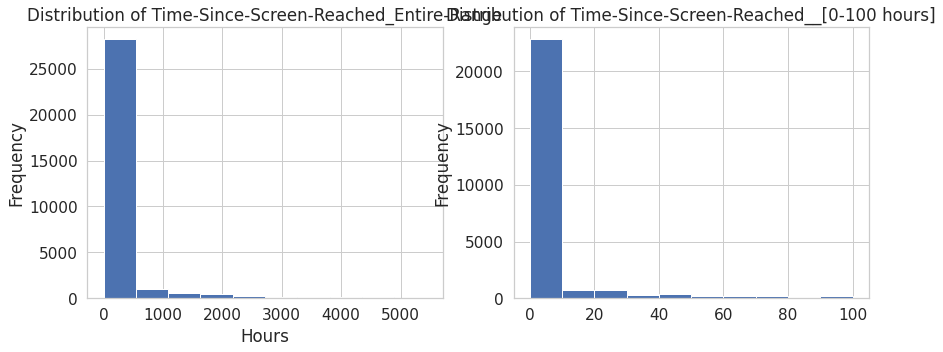

In [ ]:
# Selecting optimal time 

f,ax = plt.subplots(1,2, figsize = (14,5))
dataset["difference"].dropna().plot.hist(ax = ax[0])                            # Entire range of difference
ax[0].set_title('Distribution of Time-Since-Screen-Reached_Entire-Range')
ax[0].set_xlabel('Hours')

                                                                                
dataset["difference"].dropna().plot.hist(ax = ax[1], range = [0, 100])          # Plot first 100 hours ofdifference
ax[1].set_title('Distribution of Time-Since-Screen-Reached__[0-100 hours]')
plt.show()

In [ ]:
filt = dataset['difference'] > 48
dataset.loc[filt, 'enrolled'] = 0

dataset = dataset.drop(columns=['enrolled_date', 'difference', 'first_open'])   # Drop columns as we have already extracted information
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,dummy
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,no,no,no,no,1.0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,no,no,no,no,1.0
2,254414,1,19,23,"Splash,Cycle,Loan",3,no,yes,no,yes,1.0
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,no,no,yes,no,1.0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,no,no,yes,yes,1.0


In [ ]:
(round(dataset['enrolled'].value_counts(normalize=True).to_frame()*100,2)).astype('str') + '%'   #showing the repartition of the target variable
                                                                                                 #before and after changing

,enrolled
yes,49.7%
no,37.85%
0,12.45%


In [ ]:
top_screens = pd.read_csv('/content/drive/My Drive/Customer Analytics /top_screens.csv')  
top_screens = top_screens['top_screens']

dataset["screen_list"] = dataset['screen_list'] + ','                           # add ',' at the end, to account for the last screen in the column
print(dataset.shape)

for screen in top_screens:
    dataset[screen] = dataset["screen_list"].str.contains(screen).astype(int)
    dataset['screen_list'] = dataset['screen_list'].str.replace(screen+",", "")
print(dataset.shape)

dataset['Other'] = dataset['screen_list'].str.count(",")
dataset = dataset.drop(columns=['screen_list'])
dataset.shape

(50000, 11)
(50000, 69)


(50000, 69)

In [ ]:
top_screens.values

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [ ]:
savings_screens = ["Saving1",                                                   # All savings screens will be funneled together
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset['SavingsCount'] = dataset[savings_screens].sum(axis=1)                  # sum across each rows of savings screen

cm_screens = ["Credit1",                                                        # All credit screens will be funneled together
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)                            # sum across each rows of credit screens

cc_screens = ["CC1",                                                            # All CC1 screens will be funneled together
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)                            # sum across each rows of CC1 screens

loan_screens = ["Loan",                                                         # All loan screens will be funneled together
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)                       # sum across each rows of loan screens

dataset = dataset.drop(columns=savings_screens)                                 # drop columns
dataset = dataset.drop(columns=cm_screens)
dataset = dataset.drop(columns=cc_screens)
dataset = dataset.drop(columns=loan_screens)


print(dataset.shape)
dataset.describe()
# dataset.dtypes

(50000, 51)


,user,hour,age,numscreens,dummy,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.00,50000.00,50000.00,50000.00,50000.0,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.0,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.0,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.0,50000.00,50000.00,50000.00,5.00e+04,5.00e+04,50000.00,50000.00,50000.00,50000.00,50000.00
mean,186889.73,12.56,31.72,21.10,1.0,0.52,0.29,0.52,0.32,0.47,0.16,0.42,0.36,0.34,0.2,0.08,0.05,0.08,0.07,0.05,0.05,0.05,0.03,0.04,0.05,0.0,0.05,0.04,0.02,0.03,0.02,0.03,0.02,0.03,0.02,0.1,0.01,0.01,0.01,8.20e-03,7.58e-03,6.21,0.37,0.93,0.18,0.79
std,107768.52,7.44,10.80,15.73,0.0,0.50,0.46,0.50,0.47,0.50,0.36,0.49,0.48,0.47,0.4,0.28,0.22,0.27,0.26,0.22,0.23,0.21,0.17,0.20,0.21,0.0,0.21,0.20,0.15,0.16,0.15,0.18,0.15,0.17,0.14,0.3,0.12,0.11,0.11,9.02e-02,8.67e-02,3.67,1.41,1.22,0.61,0.68
min,13.00,0.00,16.00,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,93526.75,5.00,24.00,10.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00e+00,0.00e+00,3.00,0.00,0.00,0.00,0.00
50%,187193.50,14.00,29.00,18.00,1.0,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00e+00,0.00e+00,6.00,0.00,0.00,0.00,1.00
75%,279984.25,19.00,37.00,28.00,1.0,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00e+00,0.00e+00,8.00,0.00,1.00,0.00,1.00
max,373662.00,23.00,101.00,325.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00e+00,1.00e+00,35.00,10.00,5.00,3.00,3.00


In [ ]:
cat_col = ['liked','enrolled','used_premium_feature','minigame']
for col in cat_col:
  dataset[col] = dataset[col].apply(lambda x: 1 if x == 'yes' else 0)           # changing the categorical col from ['yes','no'] to [0,1]
dataset.dtypes                                                                  # get data type of each columns

user                          int64
dayofweek                  category
hour                          int64
age                           int64
numscreens                    int64
minigame                      int64
used_premium_feature          int64
enrolled                      int64
liked                         int64
dummy                       float64
location                      int64
Institutions                  int64
VerifyPhone                   int64
BankVerification              int64
VerifyDateOfBirth             int64
ProfilePage                   int64
VerifyCountry                 int64
Cycle                         int64
idscreen                      int64
Splash                        int64
RewardsContainer              int64
EditProfile                   int64
Finances                      int64
Alerts                        int64
Leaderboard                   int64
VerifyMobile                  int64
VerifyHousing                 int64
RewardDetail                

# **Building ML model**

In [ ]:
target = dataset["enrolled"]                                                    #splitting the dataset
dataset = dataset.drop(columns=["enrolled","dummy"])

X_train,X_test,y_train,y_test = train_test_split(dataset,target,test_size=0.2,random_state=0)

In [ ]:
train_id = X_train['user']                                                      # Removing Identifiers
X_train = X_train.drop(columns = 'user')
test_id = X_test['user']
X_test = X_test.drop(columns = 'user')

In [ ]:
def evaluate_model(y_test,y_pred):                                              #function return classifations matrix for every model
  acc = round(accuracy_score(y_test, y_pred),2)
  prec = round(precision_score(y_test, y_pred),2)                               # tp / (tp + fp)
  rec = round(recall_score(y_test, y_pred),2)                                   # tp / (tp + fn)
  f1 = round(f1_score(y_test, y_pred),2)
  return pd.DataFrame({'Metrics':['Accuracy','Precision','Recall','F1'],
                       'Scores':[acc,prec,rec,f1]})
  

In [ ]:
from sklearn.tree import DecisionTreeClassifier                                 #Decision Tree                                                           
dt_model = DecisionTreeClassifier(random_state=0)                                               
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

evaluate_model(y_test, y_pred_dt)                                               

,Metrics,Scores
0,Accuracy,0.70
1,Precision,0.69
2,Recall,0.70
3,F1,0.69


In [ ]:
from sklearn.neighbors import KNeighborsClassifier                              # K-Neirest Neigbors
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
 
evaluate_model(y_test, y_pred_knn)

,Metrics,Scores
0,Accuracy,0.71
1,Precision,0.73
2,Recall,0.66
3,F1,0.69


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier                             # Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
 
evaluate_model(y_test, y_pred_rf)

,Metrics,Scores
0,Accuracy,0.78
1,Precision,0.79
2,Recall,0.76
3,F1,0.78


In [ ]:
from sklearn.linear_model import LogisticRegression                             # Logistic Regression
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
 
evaluate_model(y_test, y_pred_lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Metrics,Scores
0,Accuracy,0.77
1,Precision,0.76
2,Recall,0.77
3,F1,0.77


In [ ]:
cross_val = cross_val_score(estimator = rf_model, X = X_train, y = y_train, cv = 10)  # Cross validation scores
print("Cross validation scores of RF model:")
print([round(x,3) for x in cross_val])
print('\n')
print("RF Accuracy: %0.3f (+/- %0.3f)" % (cross_val.mean(), cross_val.std() * 2))

Cross validation scores of RF model:
[0.788, 0.773, 0.786, 0.778, 0.775, 0.78, 0.788, 0.778, 0.79, 0.779]


RF Accuracy: 0.781 (+/- 0.011)


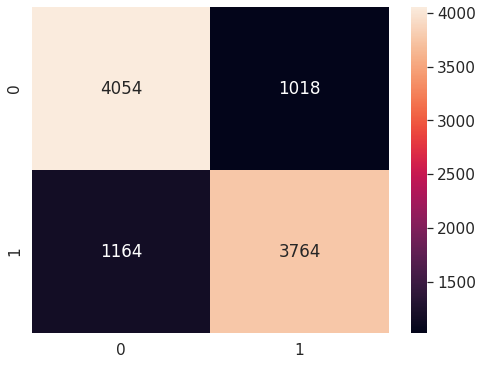

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)                                        # Confusion Matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test, y_pred_rf))                                 # Classification reports

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      5072
           1       0.79      0.76      0.78      4928

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [1]:
importance = rf_model.feature_importances_                          						# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


NameError: ignored

In [ ]:
importance_df = pd.DataFrame({'feature':X_train.columns,
                              'importance':importance})
importance_df.sort_values('importance',ascending = False,inplace=True)

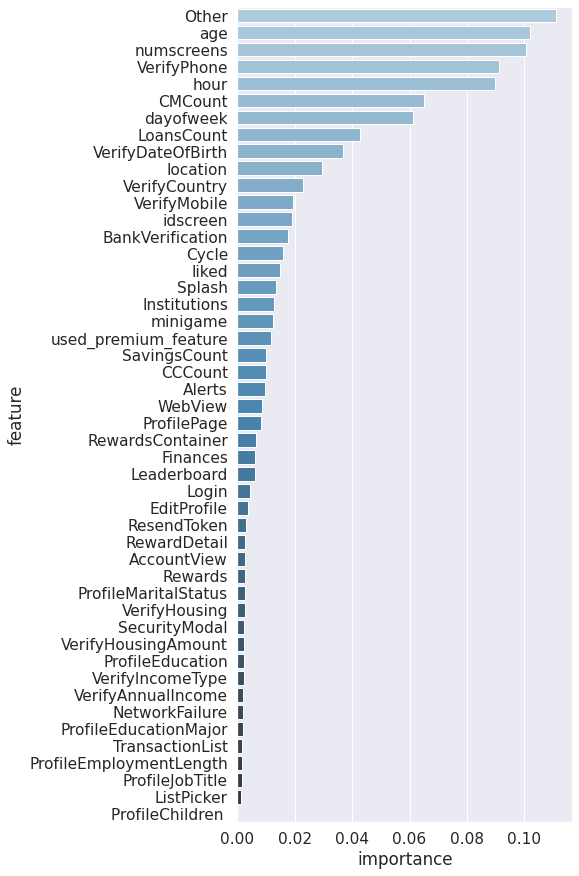

[Text(0, 0, 'Other'),
 Text(0, 0, 'age'),
 Text(0, 0, 'numscreens'),
 Text(0, 0, 'VerifyPhone'),
 Text(0, 0, 'hour'),
 Text(0, 0, 'CMCount'),
 Text(0, 0, 'dayofweek'),
 Text(0, 0, 'LoansCount'),
 Text(0, 0, 'VerifyDateOfBirth'),
 Text(0, 0, 'location'),
 Text(0, 0, 'VerifyCountry'),
 Text(0, 0, 'VerifyMobile'),
 Text(0, 0, 'idscreen'),
 Text(0, 0, 'BankVerification'),
 Text(0, 0, 'Cycle'),
 Text(0, 0, 'liked'),
 Text(0, 0, 'Splash'),
 Text(0, 0, 'Institutions'),
 Text(0, 0, 'minigame'),
 Text(0, 0, 'used_premium_feature'),
 Text(0, 0, 'SavingsCount'),
 Text(0, 0, 'CCCount'),
 Text(0, 0, 'Alerts'),
 Text(0, 0, 'WebView'),
 Text(0, 0, 'ProfilePage'),
 Text(0, 0, 'RewardsContainer'),
 Text(0, 0, 'Finances'),
 Text(0, 0, 'Leaderboard'),
 Text(0, 0, 'Login'),
 Text(0, 0, 'EditProfile'),
 Text(0, 0, 'ResendToken'),
 Text(0, 0, 'RewardDetail'),
 Text(0, 0, 'AccountView'),
 Text(0, 0, 'Rewards'),
 Text(0, 0, 'ProfileMaritalStatus'),
 Text(0, 0, 'VerifyHousing'),
 Text(0, 0, 'SecurityModal'),
 

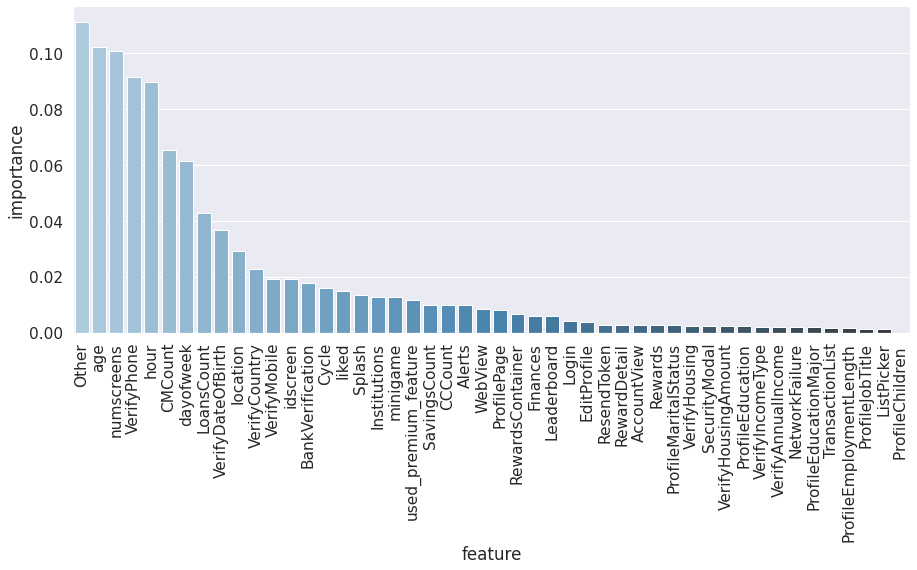

In [ ]:
f, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(data=importance_df,x='feature', y = 'importance',
            palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)